<a href="https://colab.research.google.com/github/rakibulhaque9954/delivery_package_detection/blob/main/custom_dataset_yolo_train_delivery_package.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Package Download

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.2/645.2 kB 12.1 MB/s eta 0:00:00


# YOLO Initialization

In [6]:
from ultralytics import YOLO

from IPython.display import Image, clear_output

In [3]:
model = YOLO('yolov8n.pt')
model.predict(
   source='https://media.roboflow.com/notebooks/examples/dog.jpeg',
   conf=0.25
)

100%|██████████| 6.23M/6.23M [00:00<00:00, 313MB/s]

100%|██████████| 104k/104k [00:00<00:00, 59.5MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 62.9ms
Speed: 12.7ms preprocess, 62.9ms inference, 39.1ms postprocess per image at shape (1, 3, 640, 384)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

# Dataset Download from Roboflow

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="uXfqnzjZQwFv56euF3sr")
project = rf.workspace("king-mongkuts-institute-of-technology-ladkrabang-vaztb").project("package-detection-hfpr9")
dataset = project.version(4).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.207, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Package-Detection-4 in yolov8:: 100%|██████████| 3722/3722 [00:00<00:00, 8123.23it/s]


In [5]:
dataset.location

'/content/Package-Detection-4'

**Remember to update Dataset data.yaml for the location of the train, val, test image folders.**

# Custom YOLO Training
Training yolov8 small

In [4]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=300

Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Package-Detection-4/data.yaml, epochs=25, patience=50, batch=16, imgsz=300, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, kera

# Metrics Plots

## Model training plots


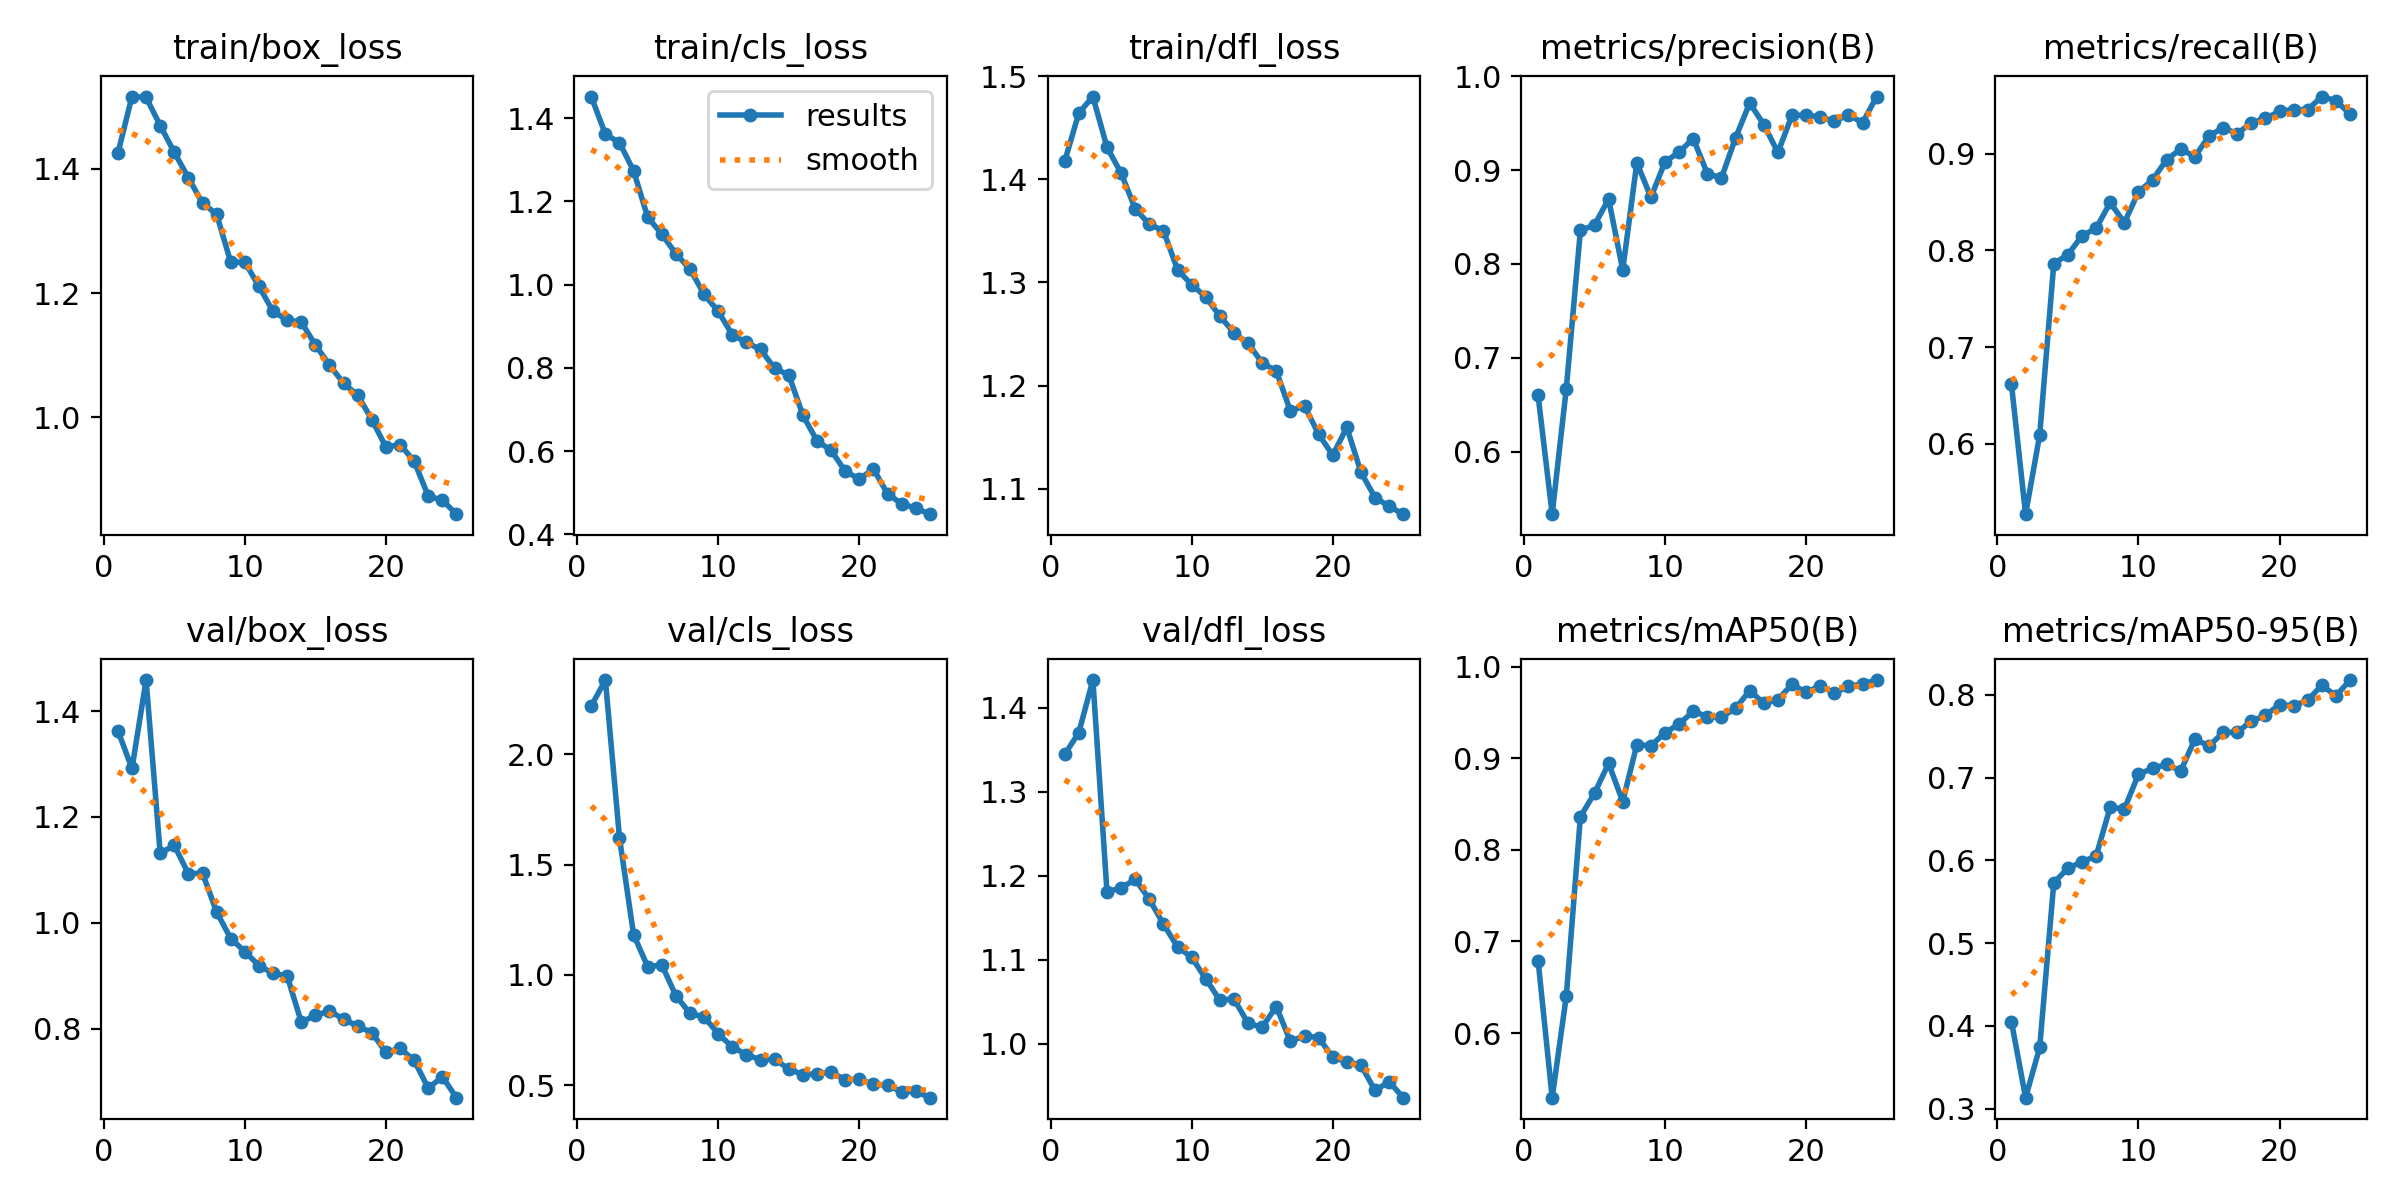

In [8]:
Image(filename='/content/runs/detect/train3/results.png', width=1500, height=800)

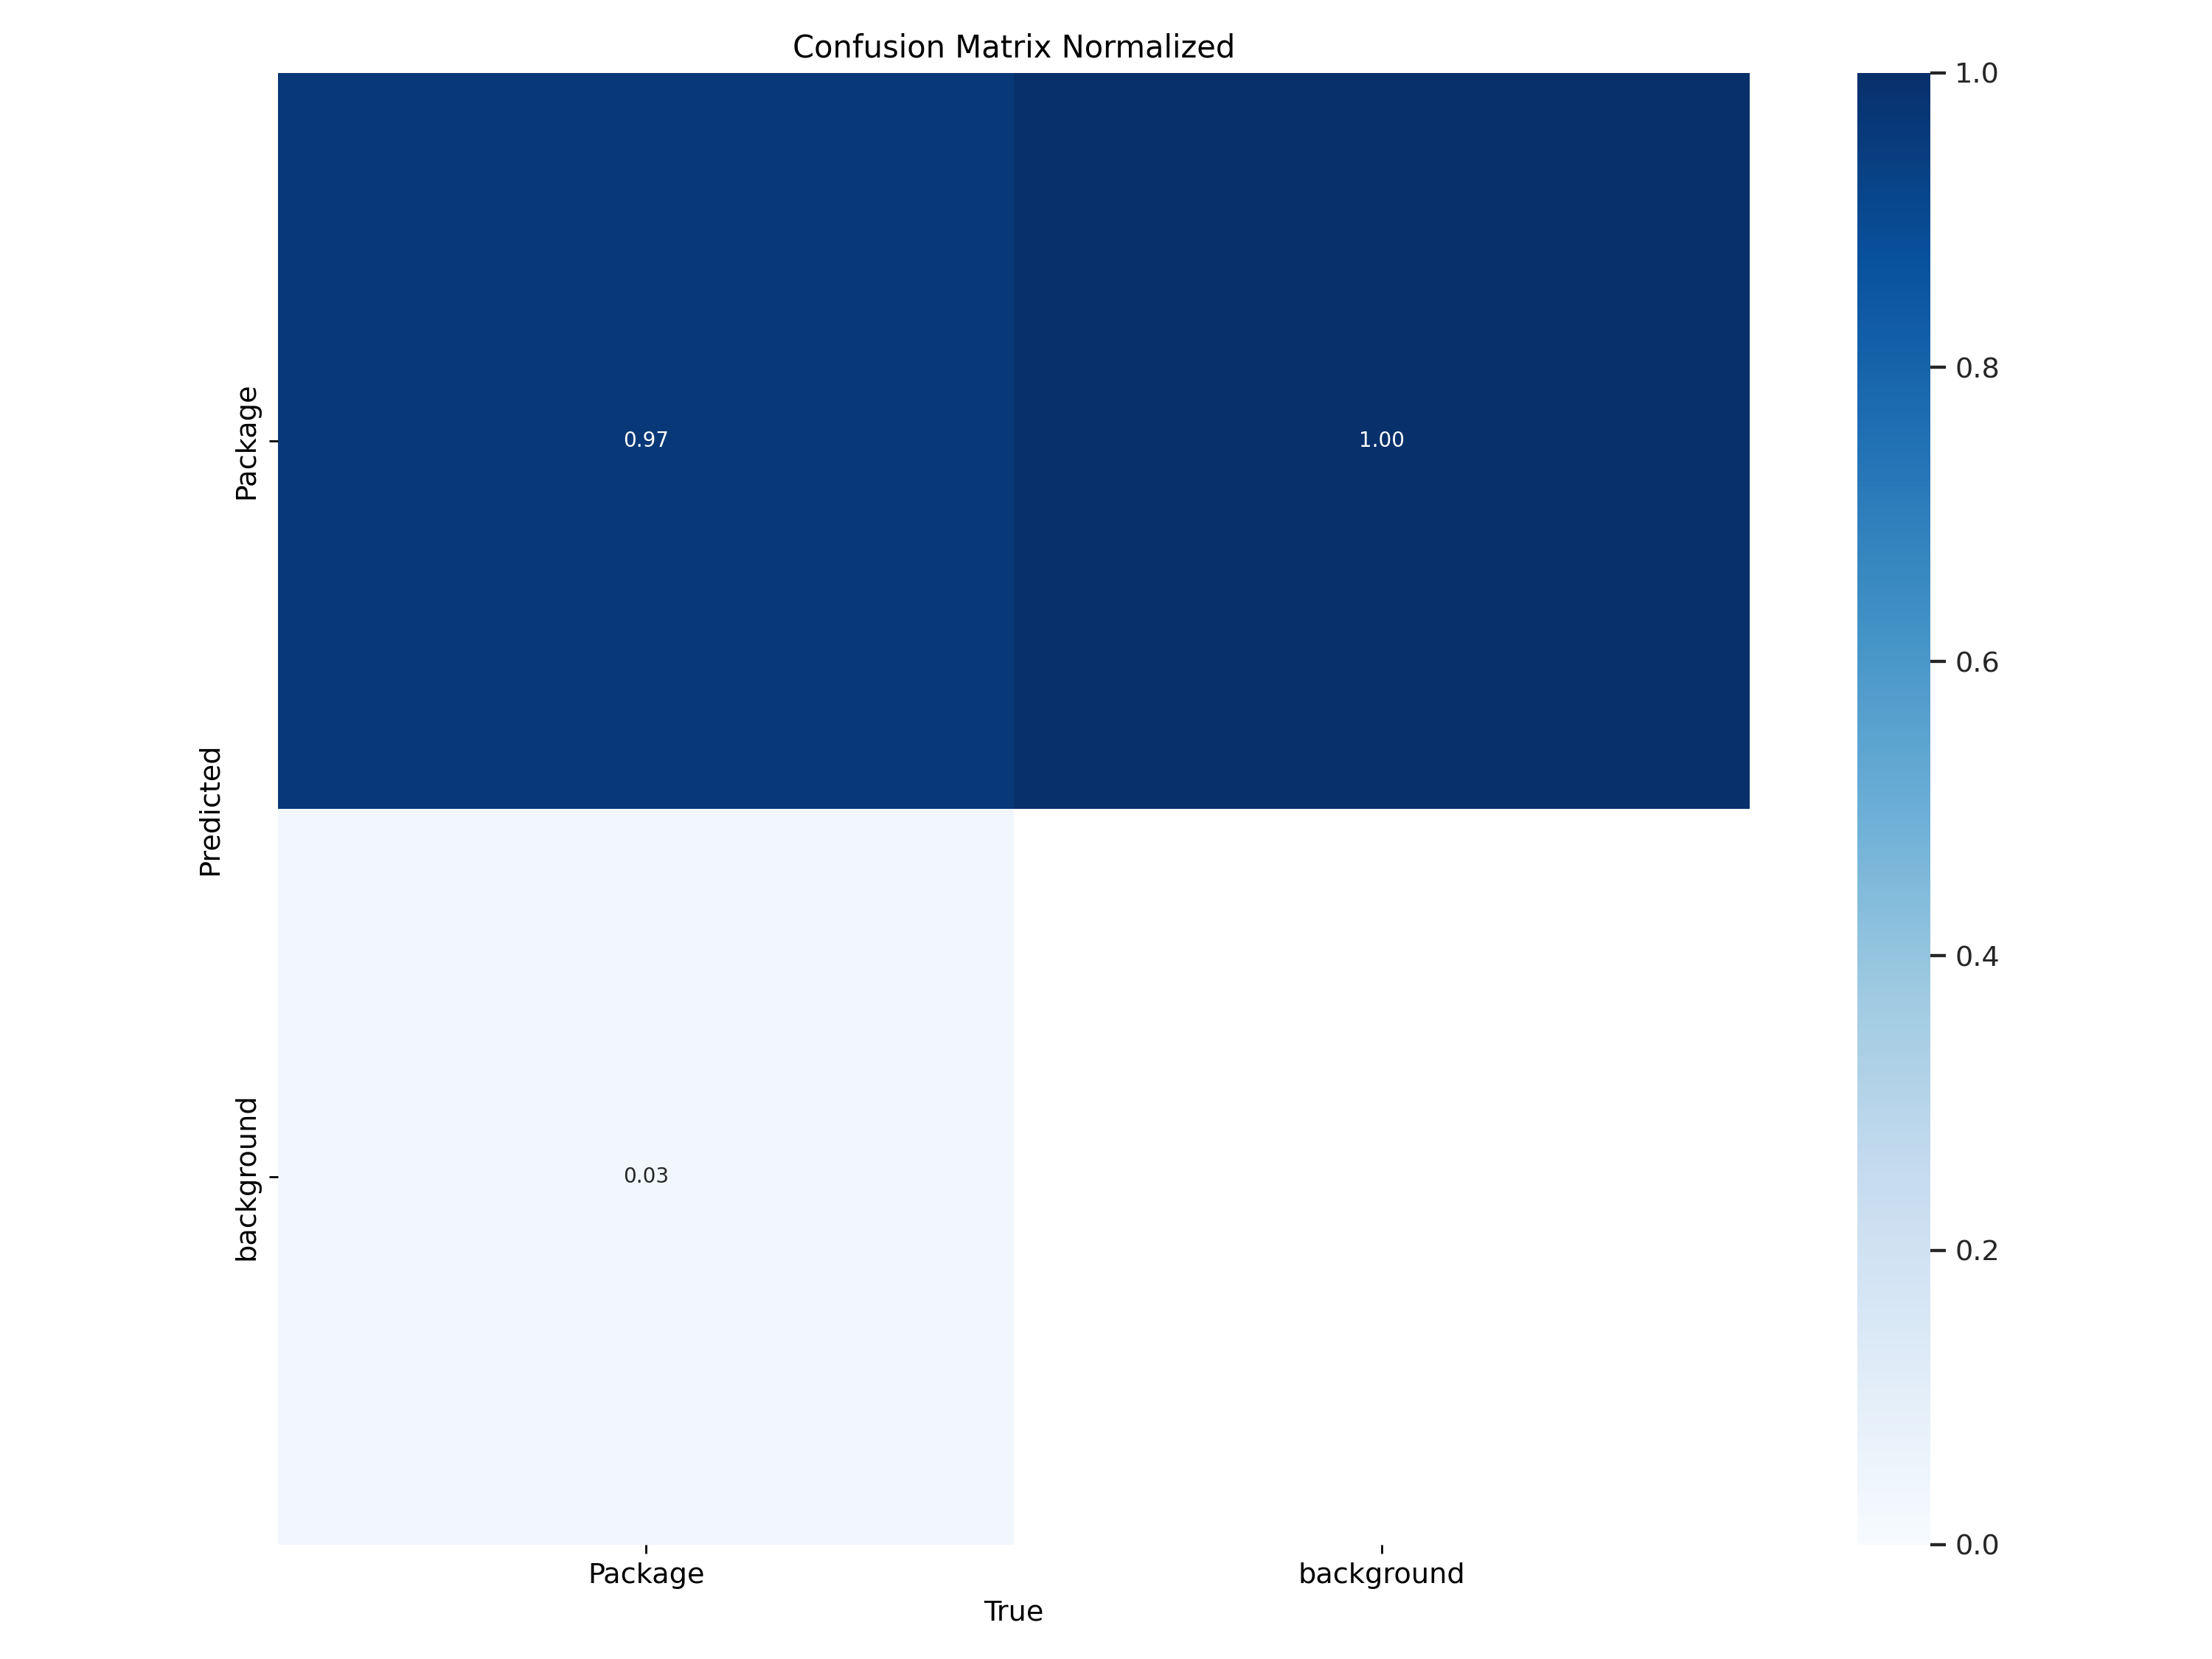

In [9]:
Image(filename='/content/runs/detect/train3/confusion_matrix_normalized.png', width=900, height=800)

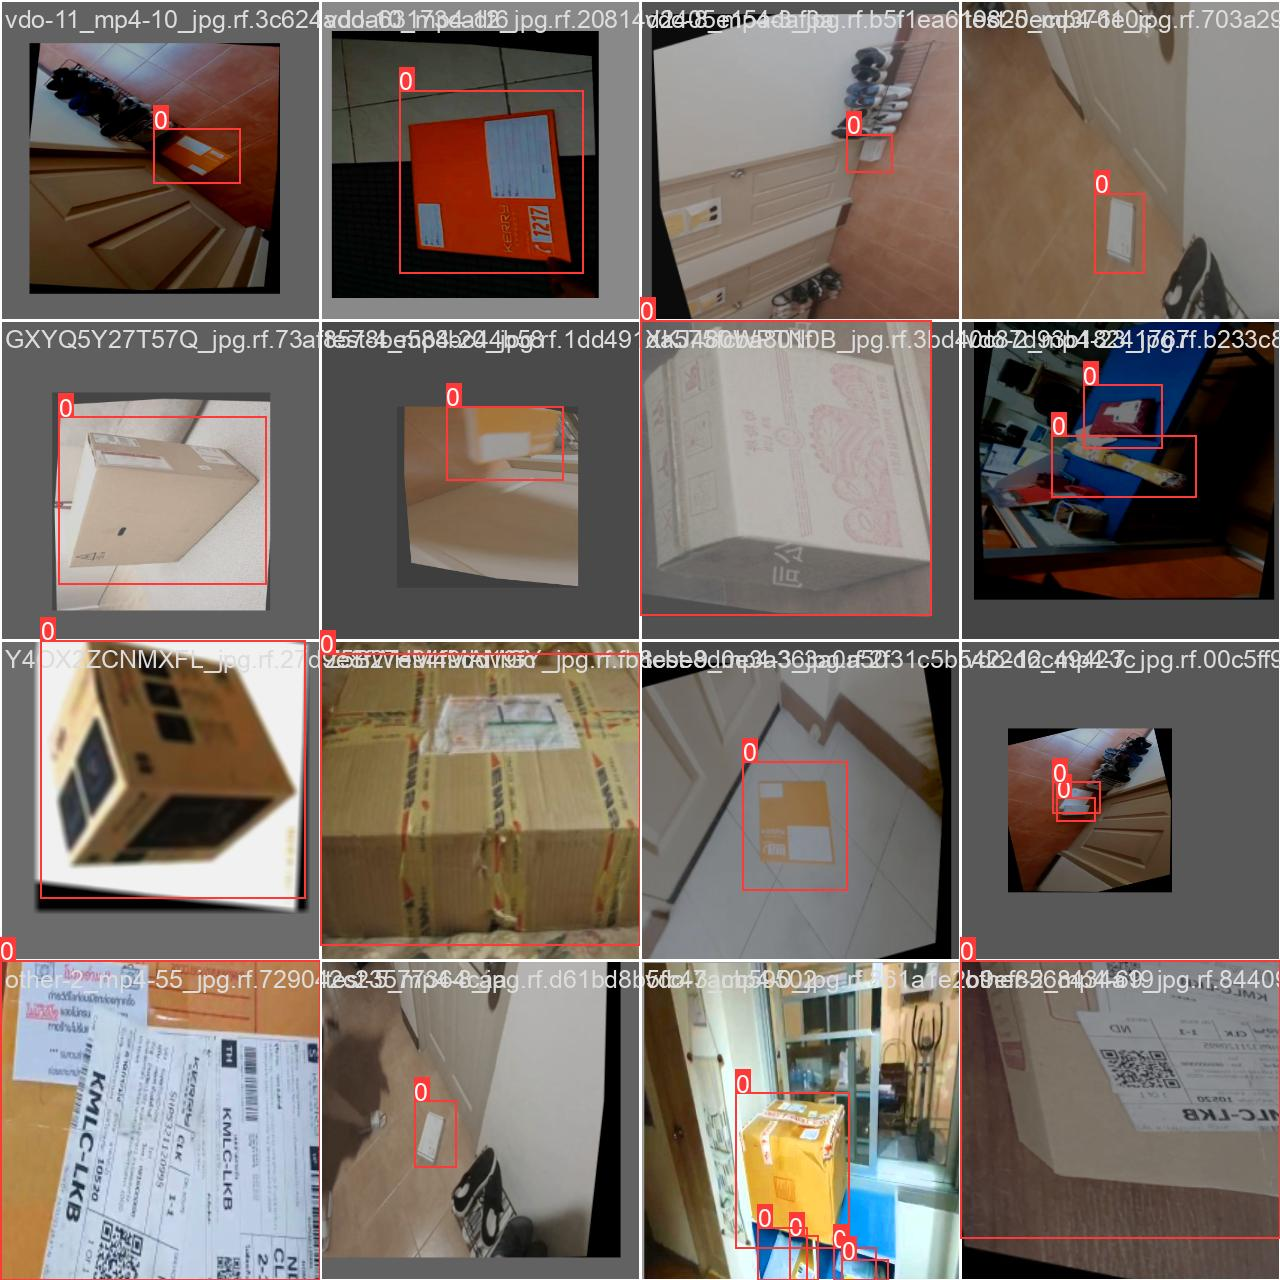

In [10]:
# Training batch model learnings
Image(filename='/content/runs/detect/train3/train_batch1532.jpg', height=800, width=900)

# Evaluation of trained model

In [11]:
!yolo task=detect \
mode=val \
model=/content/runs/detect/train3/weights/best.pt \
data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/Package-Detection-4/valid/labels.cache... 151 images, 0 backgrounds, 0 corrupt: 100% 151/151 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 10/10 [00:02<00:00,  3.60it/s]
                   all        151        220      0.978      0.941      0.986      0.821
Speed: 0.2ms preprocess, 5.9ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [12]:
!yolo task=detect \
mode=predict \
model=/content/runs/detect/train3/weights/best.pt \
conf=0.25 \
source={dataset.location}/test/images

Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/87 /content/Package-Detection-4/test/images/2LMWSKEA37ZY_jpg.rf.410148e9002d1bd715375fe63cf51464.jpg: 320x320 1 Package, 8.0ms
image 2/87 /content/Package-Detection-4/test/images/2WJONOV2946V_jpg.rf.1e95bc488904a64eac6a282a814b9ca3.jpg: 320x320 1 Package, 8.0ms
image 3/87 /content/Package-Detection-4/test/images/3BE4IOLFLEMN_jpg.rf.1be03b5b38fecec24e75a2c3339b3074.jpg: 320x320 2 Packages, 8.0ms
image 4/87 /content/Package-Detection-4/test/images/5CU04FKLAKGS_jpg.rf.51d00be2b8c0a5397c1c4bbfb55ae0ea.jpg: 320x320 2 Packages, 9.2ms
image 5/87 /content/Package-Detection-4/test/images/7O01RYE3EDR5_jpg.rf.648c15e2bf9b0f3b341af1faca88180f.jpg: 320x320 4 Packages, 8.0ms
image 6/87 /content/Package-Detection-4/test/images/IMG_6817_jpg.rf.00430bf0125172339944fb18f88bd8e7.jpg: 320x320 1 Package, 8.0ms
image 7/87 /content/P

# Roboflow Pretrained Model API

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="uXfqnzjZQwFv56euF3sr")
project = rf.workspace().project("violance-nonviolance")
model = project.version(1).model

# infer on a local image
prediction = model.predict("/content/violance-nonviolance-3/test/images/abnormal-52-_mp4-22_jpg.rf.ae8bc2461522e6529a6a5143525c076d.jpg", confidence=40, overlap=30).json()

# visualize your prediction
model.predict("/content/violance-nonviolance-3/test/images/abnormal-52-_mp4-22_jpg.rf.ae8bc2461522e6529a6a5143525c076d.jpg", confidence=40, overlap=30).save("prediction.jpg")

# infer on an image hosted elsewhere
# print(model.predict("URL_OF_YOUR_IMAGE", hosted=True, confidence=40, overlap=30).json())

loading Roboflow workspace...
loading Roboflow project...


# Inference

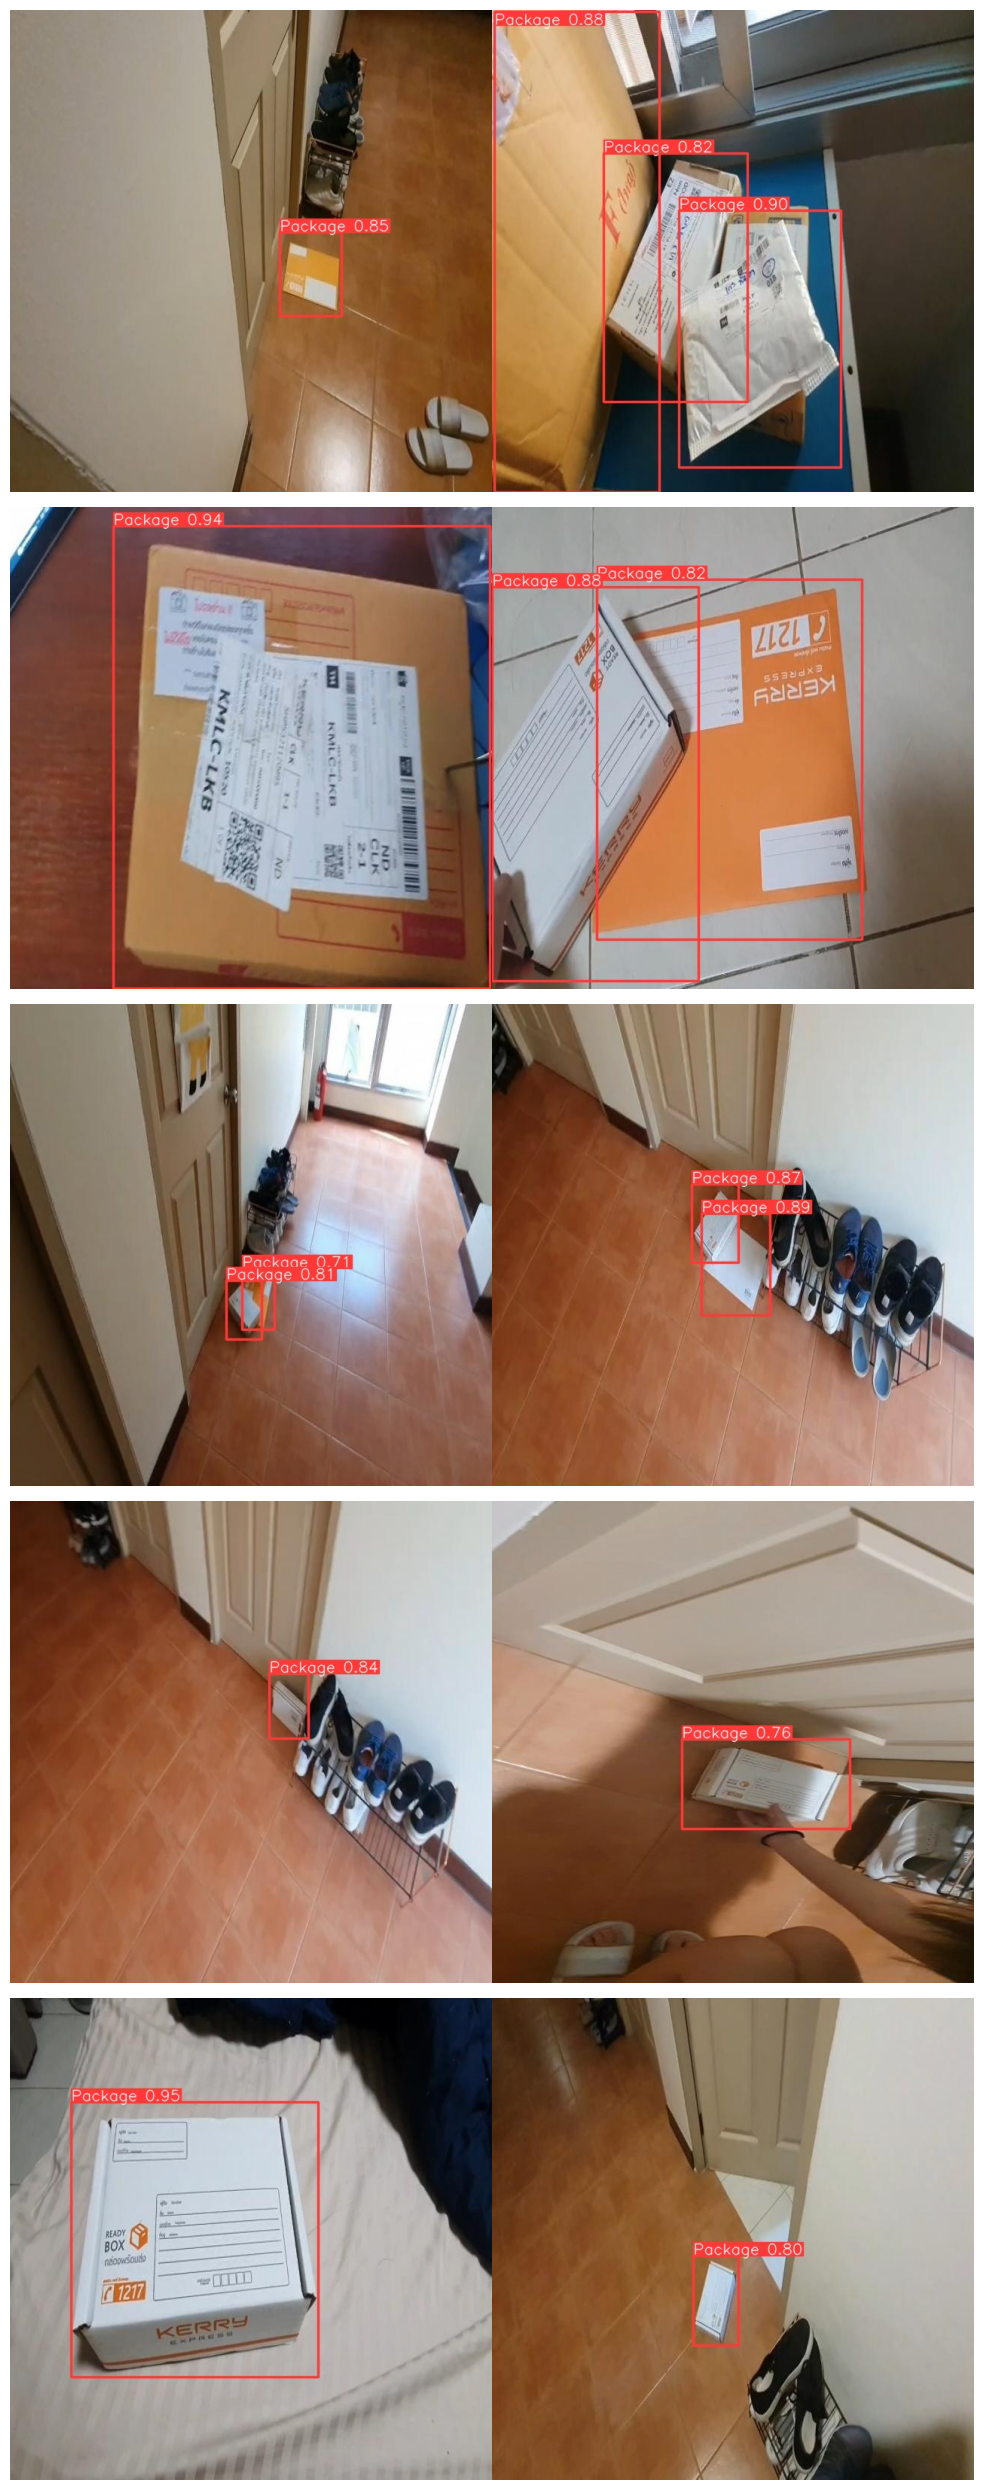

In [13]:
import os
import matplotlib.pyplot as plt

# Define the directory where images are stored
image_directory = "runs/detect/predict"
image_files = [img for img in os.listdir(image_directory) if img.endswith(".jpg")]

# Define the number of images to display
num_images_to_display = 10

# Set up the subplot grid with 5 rows and 2 columns
rows = 5
cols = 2

# Initialize a figure
fig, axes = plt.subplots(rows, cols, figsize=(10, 25))  # Adjust the size as needed
axes = axes.ravel()  # Flatten the array for easy iteration

# Loop through the first 10 images and add them to the subplots
for i, image_file in enumerate(image_files[:num_images_to_display]):
    img = plt.imread(os.path.join(image_directory, image_file))
    axes[i].imshow(img)
    axes[i].axis('off')  # Turn off axis

# If less than 10 images, turn off the remaining subplots
for j in range(i + 1, rows * cols):
    axes[j].axis('off')

plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()
